/var/folders/r6/7xx7vxyj4c13kb4vhhjyc00r0000gn/T/ipykernel_26600/570541915.py:14: DtypeWarning: Columns (5,7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("/Users/prathameshmandhare/Downloads/wildfire95.csv")
/Users/prathameshmandhare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


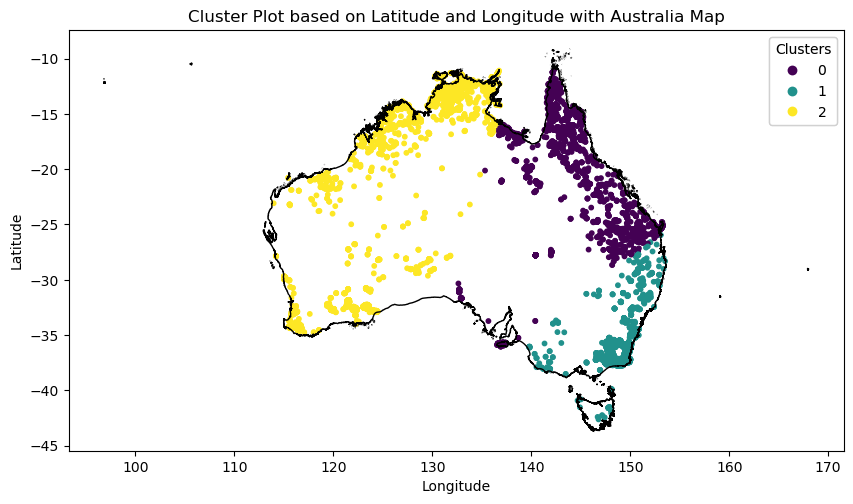

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load a sample shapefile of Australia's boundaries (replace with your actual path)
australia = gpd.read_file("/Users/prathameshmandhare/Downloads/AUS_2021_AUST_SHP_GDA2020/AUS_2021_AUST_GDA2020.shp")

# Load your wildfire dataset or use your existing DataFrame 'df_imputed'
data =pd.read_csv("/Users/prathameshmandhare/Downloads/wildfire95.csv")

# Assuming X is your data
X = df_imputed[['latitude', 'longitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict clusters for the entire dataset
y_pred = kmeans.predict(X_scaled)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot of clusters
scatter = ax.scatter(df_imputed['longitude'], df_imputed['latitude'], c=y_pred, cmap='viridis', s=10)

# Plot Australia's boundaries
australia.plot(ax=ax, color='none', edgecolor='black')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot based on Latitude and Longitude with Australia Map')

# Add a colorbar
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Show the plot
plt.show()


In [15]:
from sklearn.metrics import calinski_harabasz_score

calinski_score = calinski_harabasz_score(X_test, y_pred)
print(f"Calinski-Harabasz Index: {calinski_score}")


ValueError: Found input variables with inconsistent numbers of samples: [31105, 155524]

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Load a sample shapefile of Australia's boundaries (replace with your actual path)
australia = gpd.read_file("/Users/prathameshmandhare/Downloads/AUS_2021_AUST_SHP_GDA2020/AUS_2021_AUST_GDA2020.shp")

# Load your wildfire dataset or use your existing DataFrame 'df_imputed'
data = pd.read_csv("/Users/prathameshmandhare/Downloads/wildfire95.csv")

# Assuming X is your data
X = data[['latitude', 'longitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict clusters for the entire dataset
y_pred = kmeans.predict(X_scaled)

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters and Australia's boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot of clusters
scatter = ax.scatter(data['longitude'], data['latitude'], c=y_pred, cmap='viridis', s=10)

# Plot Australia's boundaries
australia.plot(ax=ax, color='none', edgecolor='black')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot based on Latitude and Longitude with Australia Map')

# Add a colorbar
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Show the plot
plt.show()


/var/folders/r6/7xx7vxyj4c13kb4vhhjyc00r0000gn/T/ipykernel_26600/3696026168.py:15: DtypeWarning: Columns (5,7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/prathameshmandhare/Downloads/wildfire95.csv")


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values